In [1]:
import csv
import pandas as pd
import numpy as np

# merging dataframes and divide them to experts and noobs

In [2]:
df = pd.merge(pd.read_parquet('part1.parquet', engine = 'pyarrow') , pd.read_parquet('part2.parquet', engine = 'pyarrow'), how='outer', on = 'id')

In [3]:
df.head(1)

,id,userId,userPreferredName,userDisplayName,userLocation,userFriends,userFollowers,userNumTweets,userVerified,userLanguage,...,link,body,retweetbody,tweet_dt,postedtime_y,retweetcount,favoritescount,generator,locationname,locationcode
0,"tag:search.twitter.com,2005:1000073441666654209",id:twitter.com:1732019444,BatchelorLaw,Batchelor Law Firm,Minnesota,122,185,23928,False,None,...,http://twitter.com/BatchelorLaw/statuses/10000...,RT @ChrisLu44: “The increase in gas prices is ...,“The increase in gas prices is felt most heavi...,2018-05-25,2018-05-25T17:57:43.000Z,108,0.0,Twitter Lite,None,None


In [4]:
df = df[['id','userBio','userVerified','generator','body','userPostedTime','verb']]

In [5]:
df.head(1)

,id,userBio,userVerified,generator,body,userPostedTime,verb
0,"tag:search.twitter.com,2005:1000073441666654209",None,False,Twitter Lite,RT @ChrisLu44: “The increase in gas prices is ...,2013-09-05T13:49:06.000Z,share


In [6]:
print('Total number of tweets collected: ', len(df.index))
print()
print(df.columns)

Total number of tweets collected:  1905898

Index(['id', 'userBio', 'userVerified', 'generator', 'body', 'userPostedTime',
       'verb'],
      dtype='object')


# Convert 'userpostedtime' column to readable date format

In [7]:
#!pip install arrow
import arrow

In [8]:
# Stub for helpers
# convert utc to est
def convertUTCtoFull(date):
    utc = arrow.get(date)
    return utc.to('US/Eastern').format('dddd, MMM D, YYYY h:mm A')

# convert to year
def convertUTCtoYear(date):
    utc = arrow.get(date)
    return utc.to('US/Eastern').format('YYYY')

# convert to month
def convertUTCtoMonth(date):
    utc = arrow.get(date)
    return utc.to('US/Eastern').format('MM')

# convert to day
def convertUTCtoDay(date):
    utc = arrow.get(date)
    return utc.to('US/Eastern').format('D')

# convert to month/day
def convertUTCtoMonthDay(date):
    utc = arrow.get(date)
    return utc.to('US/Eastern').format('YYYY-MM-DD')

# convert to day of week
def convertUTCtoDayOfWeek(date):
    utc = arrow.get(date)
    return utc.to('US/Eastern').format('d')

# convert to time
def convertUTCtoHourOfDay(date):
    utc = arrow.get(date)
    return int(utc.to('US/Eastern').format('HH'))

# convert to week of year
def convertUTCtoWeekNumber(date):
    return int(date.strftime('%U'))

# Strip HTML
def stripHTML(html):
    tree = ET.fromstring(html)
    return ET.tostring(tree, encoding='utf8', method='text')

# Encode with closest thing to character
def encodeText(line):
    line = unicodedata.normalize('NFKD', line).encode('ascii','ignore')
    return line

In [9]:
df = pd.DataFrame(df)
df['created_date'] = pd.to_datetime(df['userPostedTime'])
df['created_date']

0         2013-09-05 13:49:06+00:00
1         2012-02-28 15:54:18+00:00
2         2010-12-06 18:59:03+00:00
3         2013-03-08 16:52:33+00:00
4         2014-08-15 00:41:36+00:00
                     ...           
1905893   2016-04-07 21:38:36+00:00
1905894   2017-06-21 17:54:52+00:00
1905895   2017-11-01 22:25:31+00:00
1905896   2012-05-04 00:53:17+00:00
1905897   2012-10-18 01:05:21+00:00
Name: created_date, Length: 1905898, dtype: datetime64[ns, UTC]

In [10]:
df['human_date'] = df['created_date'].apply(convertUTCtoFull)
df['year'] = df['created_date'].apply(convertUTCtoYear)
df['month/day'] = df['created_date'].apply(convertUTCtoMonthDay)
df['month'] = df['created_date'].apply(convertUTCtoMonth)
df['day'] = df['created_date'].apply(convertUTCtoDay)
df['day of week'] = df['created_date'].apply(convertUTCtoDayOfWeek)
df['hour'] = df['created_date'].apply(convertUTCtoHourOfDay)
df['week'] = df['created_date'].apply(convertUTCtoWeekNumber) 
df.set_index('created_date', inplace=True)

In [11]:
df.head()

,id,userBio,userVerified,generator,body,userPostedTime,verb,human_date,year,month/day,month,day,day of week,hour,week
created_date,,,,,,,,,,,,,,,
2013-09-05 13:49:06+00:00,"tag:search.twitter.com,2005:1000073441666654209",None,False,Twitter Lite,RT @ChrisLu44: “The increase in gas prices is ...,2013-09-05T13:49:06.000Z,share,"Thursday, Sep 5, 2013 9:49 AM",2013,2013-09-05,09,5,4,9,35
2012-02-28 15:54:18+00:00,"tag:search.twitter.com,2005:1000121300550062080",None,False,LinkedIn,Heading into the Memorial Day weekend those in...,2012-02-28T15:54:18.000Z,post,"Tuesday, Feb 28, 2012 10:54 AM",2012,2012-02-28,02,28,2,10,9
2010-12-06 18:59:03+00:00,"tag:search.twitter.com,2005:1000138945731031040","Student of Constitution & Common Law,Patriot #...",False,Facebook,Retweeted Ron Paul (@RonPaul):\n\nInflation is...,2010-12-06T18:59:03.000Z,post,"Monday, Dec 6, 2010 1:59 PM",2010,2010-12-06,12,6,1,13,49
2013-03-08 16:52:33+00:00,"tag:search.twitter.com,2005:1000149645920735232","Energy market analyst providing investors, tra...",False,Twitter Web Client,"Oil prices fall on talk of hike in production,...",2013-03-08T16:52:33.000Z,post,"Friday, Mar 8, 2013 11:52 AM",2013,2013-03-08,03,8,5,11,9
2014-08-15 00:41:36+00:00,"tag:search.twitter.com,2005:1000209220619337728",Pro-life Libertarian atheist. If you're willin...,False,Twitter for iPhone,RT @malmuggeridge: The Abortion controversy is...,2014-08-15T00:41:36.000Z,share,"Thursday, Aug 14, 2014 8:41 PM",2014,2014-08-14,08,14,4,20,32


# Natural Language Processing
## Text Normalisation

Text data contains several "noise" in the form of special characters such as hashtags, punctuation, numbers and the casing of words i.e if both upper case and lower case versions of the same words are included, the computer will detect these as different entities, even though they may be the same. All of which are difficult for computers to understand if they are present in the data. Therefore, in order for machines to easily detect the patterns in the data, it is key to process language data by removing these noise known as text normalisation.
## Stop words

Default stop words from nltk were used. Stop words are commonly occurring words that for some computational processes provide little information or in some cases introduce unnecessary noise and therefore should be removed. This is particularly the case for text classification tasks.

## Stemming

Stemming is the process of reducing words to their root form. For example, the words “rain”, “raining” and “rained” have very similar, and in many cases, the same meaning. The process of stemming will reduce these to the root form of “rain”. This is again a way to reduce noise and the dimensionality of the data.
Note that the tweets need to be tokenise before stemming the data. This is a method used to split the text into its constituent parts usually words. The code below uses NLTK to do this. I have put the output into a new column called “text_tokens”.

## Lemmatization

Words were lemmatized to reduce each word to its base form.
The goal of lemmatization is the same as for stemming, in that it aims to reduce words to their root form. However, stemming is known to be a fairly crude method of doing this. Lemmatization, on the other hand, is a tool that performs full morphological analysis to more accurately find the root, or “lemma” for a word.

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# nltk
import nltk
from nltk.corpus import stopwords
from  nltk.stem import SnowballStemmer
import regex as re

In [13]:
stop_words = stopwords.words("english")
stemmer = SnowballStemmer("english")

In [14]:
# Text cleaning
text_cleaning_re = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

def preprocess(text, stem=False):
    # Remove http link, user, special characters, punctuations, numbers,
    # Convert text to lowercase  
    # Remove stop words
    text = re.sub(text_cleaning_re, ' ', str(text).lower()).strip()
    tokens = []
    for token in text.split():
        if token not in stop_words:
            if stem:
                tokens.append(stemmer.stem(token))
            else:
                tokens.append(token)
    return " ".join(tokens)

In [15]:
%%time
df['body'] = df['body'].apply(lambda x: preprocess(x))

CPU times: user 1min 40s, sys: 203 ms, total: 1min 40s
Wall time: 1min 40s


In [16]:
from nltk.stem import WordNetLemmatizer

In [17]:
#Lemmatise
lemmatizer = WordNetLemmatizer()

for i in range(len(df['body'])):
    words = df.iloc[i,4]
    # Print(words)
    list_words = words.split()
    text_lem = [lemmatizer.lemmatize(i) for i in list_words]
    cleaned_string = ' '.join(text_lem)
    df.iloc[i,1] = cleaned_string

In [18]:
# Example of outcome
df.body[0]

'rt chrislu44 increase gas prices felt heavily lower income americans especially south people drive'

In [19]:
list = ('professor', 'journalist','researcher','economist','economy','analyst')
pattern = '|'.join(list)

In [20]:
dfexpert = df[df['userBio'].str.contains(pattern)]

In [21]:
dfexpert.head(1)

,id,userBio,userVerified,generator,body,userPostedTime,verb,human_date,year,month/day,month,day,day of week,hour,week
created_date,,,,,,,,,,,,,,,
2010-05-14 02:22:22+00:00,"tag:search.twitter.com,2005:1002505939226972160",rt aspergirl trump tariff ally part ongoing te...,False,Twitter for iPad,rt aspergirl trump tariffs allies part ongoing...,2010-05-14T02:22:22.000Z,share,"Thursday, May 13, 2010 10:22 PM",2010,2010-05-13,05,13,4,22,19


In [22]:
dfnotexpert = pd.concat([df, dfexpert, dfexpert]).drop_duplicates(keep=False)

In [23]:
dfnotexpert.head(1)

,id,userBio,userVerified,generator,body,userPostedTime,verb,human_date,year,month/day,month,day,day of week,hour,week
created_date,,,,,,,,,,,,,,,
2013-09-05 13:49:06+00:00,"tag:search.twitter.com,2005:1000073441666654209",rt chrislu44 increase gas price felt heavily l...,False,Twitter Lite,rt chrislu44 increase gas prices felt heavily ...,2013-09-05T13:49:06.000Z,share,"Thursday, Sep 5, 2013 9:49 AM",2013,2013-09-05,09,5,4,9,35


Sentiment analysis using VADER
Assuming that the changes in stock prices of a company, the rises and falls are influenced by the public opinions being expressed in tweets about that company, it is important to understand the author’s opinion from a piece of text, which is the objective of sentiment analysis.

Sentiment analysis is the use of natural language processing, text analysis, computational linguistics, and biometrics to systematically recognize, extract, quantify, and study emotional states and subjective information.

Usually, sentiment analysis’ purpose is to determine the attitude of a speaker, writer, or other subject with respect to overall contextual emotional reaction to a document or event.

Sentiment analysis is a process that aims to determine the emotional tone of text or voice data. For the sentiment analysis of Trump’s tweets, the Python module ‘VADER’ aims to determine the sentiment of a tweet by parsing through each sentence - each tweet text is taken as an input and passed to an algorithm that outputs a perceived sentiment score between -1 and +1, essentially determine whether each Tweet is positive, neutral, or negative. For instance, a Tweet including the word “wrong” would usually be given a negative score. Moreover, a Tweet containing the phrase “thank you” would usually be given a positive score. Of course, there are ways in which a Tweet may not always be given the correct sentiment, specifically for economic variables. For example, “high unemployment” may be given a positive sentiment when low unemployment is actually better for the economy.

However, for this project, the assumption that I have used is the default VADER functionality as it has already undergone testing on large datasets through machine learning. Therefore, the assumption is that a positive tweet posted by Donald Trump about a company would encourage people to invest in the stocks of that company and as a result the stock price of that company would increase, vice versa.

In [24]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

def vader_sentiment(text):
    """ Calculate and return the nltk vader (lexicon method) sentiment """
    return sid.polarity_scores(text)['compound']

# Create a new column for vader compound sentiment score
dfexpert['vader compound'] = dfexpert['body'].apply(vader_sentiment)

def categorise_sentiment(sentiment, neg_threshold=-0.005, pos_threshold=0.005):
    """ categorise the sentiment value as positive (1), negative (-1) 
        or neutral (0) based on given thresholds """
    if sentiment < neg_threshold:
        label = 'negative'
    elif sentiment > pos_threshold:
        label = 'positive'
    else:
        label = 'neutral'
    return label

/var/folders/tz/6np8lrtx49j_z08jj3cs47mm0000gn/T/ipykernel_9772/2099260727.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfexpert['vader compound'] = dfexpert['body'].apply(vader_sentiment)


In [25]:
# Create a new column with vader sentiment label based on vader compound score
dfexpert['vader sentiment'] = dfexpert['vader compound'].apply(categorise_sentiment)

/var/folders/tz/6np8lrtx49j_z08jj3cs47mm0000gn/T/ipykernel_9772/678748422.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfexpert['vader sentiment'] = dfexpert['vader compound'].apply(categorise_sentiment)


In [26]:
dfexpert

,id,userBio,userVerified,generator,body,userPostedTime,verb,human_date,year,month/day,month,day,day of week,hour,week,vader compound,vader sentiment
created_date,,,,,,,,,,,,,,,,,
2010-05-14 02:22:22+00:00,"tag:search.twitter.com,2005:1002505939226972160",rt aspergirl trump tariff ally part ongoing te...,False,Twitter for iPad,rt aspergirl trump tariffs allies part ongoing...,2010-05-14T02:22:22.000Z,share,"Thursday, May 13, 2010 10:22 PM",2010,2010-05-13,05,13,4,22,19,0.0000,neutral
2014-10-17 20:15:39+00:00,"tag:search.twitter.com,2005:1007788499247030272",rt okwindpower researcher hope result offer po...,False,Twitter Lite,rt okwindpower researchers hope results offer ...,2014-10-17T20:15:39.000Z,share,"Friday, Oct 17, 2014 4:15 PM",2014,2014-10-17,10,17,5,16,41,0.4404,positive
2009-03-23 16:34:31+00:00,"tag:search.twitter.com,2005:1009055954485284864",rt steve hanke imagination good child economis...,False,Twitterrific for iOS,rt steve hanke imagination good children econo...,2009-03-23T16:34:31.000Z,share,"Monday, Mar 23, 2009 12:34 PM",2009,2009-03-23,03,23,1,12,12,0.6486,positive
2009-07-07 18:21:07+00:00,"tag:search.twitter.com,2005:1011573613768728576",record crude output pump prospect permian basi...,False,Twitter for iPhone,record crude output pumps prospects permian ba...,2009-07-07T18:21:07.000Z,post,"Tuesday, Jul 7, 2009 2:21 PM",2009,2009-07-07,07,7,2,14,27,-0.3612,negative
2012-07-19 21:18:02+00:00,"tag:search.twitter.com,2005:1012534151700938754",realdonaldtrump exactly accomplished tax break...,False,Twitter for iPad,realdonaldtrump exactly accomplished tax break...,2012-07-19T21:18:02.000Z,post,"Thursday, Jul 19, 2012 5:18 PM",2012,2012-07-19,07,19,4,17,29,0.3182,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2009-04-24 21:26:00+00:00,"tag:search.twitter.com,2005:982436889608183809",rt tedlieu dear tuckercarlson ca grown 6th lar...,False,Twitterrific,rt tedlieu dear tuckercarlson ca grown 6th lar...,2009-04-24T21:26:00.000Z,share,"Friday, Apr 24, 2009 5:26 PM",2009,2009-04-24,04,24,5,17,16,-0.0772,negative
2009-02-21 20:47:38+00:00,"tag:search.twitter.com,2005:982551213148397568",rt tedlieu dear tuckercarlson ca grown 6th lar...,False,Twitter for Android,rt tedlieu dear tuckercarlson ca grown 6th lar...,2009-02-21T20:47:38.000Z,share,"Saturday, Feb 21, 2009 3:47 PM",2009,2009-02-21,02,21,6,15,7,-0.0772,negative
2010-04-12 18:17:46+00:00,"tag:search.twitter.com,2005:982716459632742400",rt tedlieu dear tuckercarlson ca grown 6th lar...,False,Twitter for iPhone,rt tedlieu dear tuckercarlson ca grown 6th lar...,2010-04-12T18:17:46.000Z,share,"Monday, Apr 12, 2010 2:17 PM",2010,2010-04-12,04,12,1,14,15,-0.0772,negative


In [27]:
def categorise_SA(sentiment, neg_tweets='negative', pos_tweets='positive'):
    """ categorise the sentiment value as positive (1), negative (-1) 
        or neutral (0) based on given thresholds """
    if sentiment == neg_tweets:
        label = -1
    elif sentiment == pos_tweets:
        label = 1
    else:
        label = 0
    return label

In [28]:

# Create a new column with vader sentiment label based on vader compound score
dfexpert['SA'] = dfexpert['vader sentiment'].apply(categorise_SA)

# Display the updated dataframe with the new column:
display(dfexpert.head(50))

/var/folders/tz/6np8lrtx49j_z08jj3cs47mm0000gn/T/ipykernel_9772/139648537.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfexpert['SA'] = dfexpert['vader sentiment'].apply(categorise_SA)


,id,userBio,userVerified,generator,body,userPostedTime,verb,human_date,year,month/day,month,day,day of week,hour,week,vader compound,vader sentiment,SA
created_date,,,,,,,,,,,,,,,,,,
2010-05-14 02:22:22+00:00,"tag:search.twitter.com,2005:1002505939226972160",rt aspergirl trump tariff ally part ongoing te...,False,Twitter for iPad,rt aspergirl trump tariffs allies part ongoing...,2010-05-14T02:22:22.000Z,share,"Thursday, May 13, 2010 10:22 PM",2010,2010-05-13,05,13,4,22,19,0.0000,neutral,0
2014-10-17 20:15:39+00:00,"tag:search.twitter.com,2005:1007788499247030272",rt okwindpower researcher hope result offer po...,False,Twitter Lite,rt okwindpower researchers hope results offer ...,2014-10-17T20:15:39.000Z,share,"Friday, Oct 17, 2014 4:15 PM",2014,2014-10-17,10,17,5,16,41,0.4404,positive,1
2009-03-23 16:34:31+00:00,"tag:search.twitter.com,2005:1009055954485284864",rt steve hanke imagination good child economis...,False,Twitterrific for iOS,rt steve hanke imagination good children econo...,2009-03-23T16:34:31.000Z,share,"Monday, Mar 23, 2009 12:34 PM",2009,2009-03-23,03,23,1,12,12,0.6486,positive,1
2009-07-07 18:21:07+00:00,"tag:search.twitter.com,2005:1011573613768728576",record crude output pump prospect permian basi...,False,Twitter for iPhone,record crude output pumps prospects permian ba...,2009-07-07T18:21:07.000Z,post,"Tuesday, Jul 7, 2009 2:21 PM",2009,2009-07-07,07,7,2,14,27,-0.3612,negative,-1
2012-07-19 21:18:02+00:00,"tag:search.twitter.com,2005:1012534151700938754",realdonaldtrump exactly accomplished tax break...,False,Twitter for iPad,realdonaldtrump exactly accomplished tax break...,2012-07-19T21:18:02.000Z,post,"Thursday, Jul 19, 2012 5:18 PM",2012,2012-07-19,07,19,4,17,29,0.3182,positive,1
2011-09-08 05:36:39+00:00,"tag:search.twitter.com,2005:1014596916175257600",economy experiencing inflation deflation price...,False,nativeheros.com,economy experiencing inflation deflation price...,2011-09-08T05:36:39.000Z,post,"Thursday, Sep 8, 2011 1:36 AM",2011,2011-09-08,09,8,4,1,36,0.2960,positive,1
2018-06-13 23:47:45+00:00,"tag:search.twitter.com,2005:1029459331228618752",donald aper mommyof3clj omarosa yes get 900 sa...,False,Twitter for Android,donald aper mommyof3clj omarosa yes get 900 sa...,2018-06-13T23:47:45.000Z,post,"Wednesday, Jun 13, 2018 7:47 PM",2018,2018-06-13,06,13,3,19,23,0.8074,positive,1
2018-03-16 22:44:56+00:00,"tag:search.twitter.com,2005:1030073228662734859",rt realdonaldtrump economy better ever money p...,False,Twitter for iPhone,rt realdonaldtrump economy better ever money p...,2018-03-16T22:44:56.000Z,share,"Friday, Mar 16, 2018 6:44 PM",2018,2018-03-16,03,16,5,18,10,0.8271,positive,1
2017-01-21 03:23:24+00:00,"tag:search.twitter.com,2005:1030076395886505985",rt realdonaldtrump economy better ever money p...,False,Twitter for Android,rt realdonaldtrump economy better ever money p...,2017-01-21T03:23:24.000Z,share,"Friday, Jan 20, 2017 10:23 PM",2017,2017-01-20,01,20,5,22,3,0.8271,positive,1


In [46]:
dfexpert.isnull().sum()

id                 0
userBio            0
userVerified       0
generator          0
body               0
userPostedTime     0
verb               0
human_date         0
year               0
month/day          0
month              0
day                0
day of week        0
hour               0
week               0
vader compound     0
vader sentiment    0
SA                 0
dtype: int64

In [48]:
dfexpert.to_csv('../cleaned_tweets.csv', sep='\t')

In [63]:
tweets_experts = pd.read_csv('../cleaned_tweets.csv', sep='\t', parse_dates=['month/day'], index_col=['month/day'])

In [64]:
tweets_experts.head()

,created_date,id,userBio,userVerified,generator,body,userPostedTime,verb,human_date,year,month,day,day of week,hour,week,vader compound,vader sentiment,SA
month/day,,,,,,,,,,,,,,,,,,
2010-05-13,2010-05-14 02:22:22+00:00,"tag:search.twitter.com,2005:1002505939226972160",rt aspergirl trump tariff ally part ongoing te...,False,Twitter for iPad,rt aspergirl trump tariffs allies part ongoing...,2010-05-14T02:22:22.000Z,share,"Thursday, May 13, 2010 10:22 PM",2010,5,13,4,22,19,0.0000,neutral,0
2014-10-17,2014-10-17 20:15:39+00:00,"tag:search.twitter.com,2005:1007788499247030272",rt okwindpower researcher hope result offer po...,False,Twitter Lite,rt okwindpower researchers hope results offer ...,2014-10-17T20:15:39.000Z,share,"Friday, Oct 17, 2014 4:15 PM",2014,10,17,5,16,41,0.4404,positive,1
2009-03-23,2009-03-23 16:34:31+00:00,"tag:search.twitter.com,2005:1009055954485284864",rt steve hanke imagination good child economis...,False,Twitterrific for iOS,rt steve hanke imagination good children econo...,2009-03-23T16:34:31.000Z,share,"Monday, Mar 23, 2009 12:34 PM",2009,3,23,1,12,12,0.6486,positive,1
2009-07-07,2009-07-07 18:21:07+00:00,"tag:search.twitter.com,2005:1011573613768728576",record crude output pump prospect permian basi...,False,Twitter for iPhone,record crude output pumps prospects permian ba...,2009-07-07T18:21:07.000Z,post,"Tuesday, Jul 7, 2009 2:21 PM",2009,7,7,2,14,27,-0.3612,negative,-1
2012-07-19,2012-07-19 21:18:02+00:00,"tag:search.twitter.com,2005:1012534151700938754",realdonaldtrump exactly accomplished tax break...,False,Twitter for iPad,realdonaldtrump exactly accomplished tax break...,2012-07-19T21:18:02.000Z,post,"Thursday, Jul 19, 2012 5:18 PM",2012,7,19,4,17,29,0.3182,positive,1


In [65]:
# Drop irrelevant columns
tweets_experts.drop(columns = ['created_date','id','userVerified','verb',
                    'generator', 'year','month',
       'day', 'day of week', 'hour', 'week','SA'], axis=1, inplace = True)

In [66]:
tweets_sum_df = tweets_experts.resample('D').sum()

In [67]:
tweets_sum_df.columns

Index(['vader compound'], dtype='object')

In [68]:
def categorise_sentiment(sentiment, neg_threshold=-0.005, pos_threshold=0.005):
    """ categorise the sentiment value as positive (1), negative (-1) 
        or neutral (0) based on given thresholds """
    if sentiment < neg_threshold:
        label = 'negative'
    elif sentiment > pos_threshold:
        label = 'positive'
    else:
        label = 'neutral'
    return label

# new col with vader sentiment label based on vader compound score
tweets_sum_df['vader sentiment'] = tweets_sum_df['vader compound'].apply(categorise_sentiment)

In [69]:
tweets_sum_df.to_csv('../cleaned_tweets_sum_df.csv', sep='\t')

# Preprocessing: Combined Data

In [29]:
import csv
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

# Obtain trading data: S&P 500 (^GSPC)


In [32]:
# STOCK SCRAPING PROGRAM #

# !pip install pandas_datareader
import pandas_datareader.data as web
import datetime as dt

(2016, 6)
                  High         Low        Open       Close      Volume  \
Date                                                                     
2009-01-20  849.640015  804.469971  849.640015  805.219971  6375230000   
2009-01-21  841.719971  804.299988  806.770020  840.239990  6467830000   
2009-01-22  839.739990  811.289978  839.739990  827.500000  5843830000   
2009-01-23  838.609985  806.070007  822.159973  831.950012  5832160000   
2009-01-26  852.530029  827.690002  832.500000  836.570007  6039940000   

             Adj Close  
Date                    
2009-01-20  805.219971  
2009-01-21  840.239990  
2009-01-22  827.500000  
2009-01-23  831.950012  
2009-01-26  836.570007  
                   High          Low         Open        Close      Volume  \
Date                                                                         
2017-01-13  2278.679932  2271.510010  2272.739990  2274.639893  3081270000   
2017-01-17  2272.080078  2262.810059  2269.139893  2267.889893

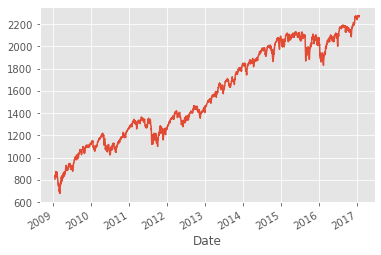

In [39]:
#FOR S&P 500 (^GSPC)
start = dt.datetime(2009, 1, 20)
end = dt.datetime(2017, 1, 20)

df_SP500 = web.DataReader('^GSPC', 'yahoo', start, end)
print(df_SP500.shape)

print(df_SP500.head(5))
print(df_SP500.tail(5))

df_SP500["Close"].plot()
plt.show()

#Save CSV
df_SP500.to_csv('../SP500.csv', sep='\t')

In [40]:
trade = pd.read_csv('../SP500.csv', sep='\t')

In [41]:
trade.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2009-01-20,849.640015,804.469971,849.640015,805.219971,6375230000,805.219971
1,2009-01-21,841.719971,804.299988,806.770020,840.239990,6467830000,840.239990
2,2009-01-22,839.739990,811.289978,839.739990,827.500000,5843830000,827.500000
3,2009-01-23,838.609985,806.070007,822.159973,831.950012,5832160000,831.950012
4,2009-01-26,852.530029,827.690002,832.500000,836.570007,6039940000,836.570007


In [42]:
# Calculate Return: Use pct_change() function to add the one day returns to the dataframe 
trade_pctchange_close = trade.Close.pct_change() # i.e. (Close[Day] - Close[Day-1])/Close[Day-1])
trade['Return'] = trade_pctchange_close

# Calculate Intraday Return 
trade_intraday_return  = ((trade['Close'].sub(trade['Open']).div(trade['Open']))).fillna(0)
trade['Intraday Return'] = trade_intraday_return # i.e. (Open[Day] - Close[Day]) * 100

# Calculate Volume Return: Use pct_change() function to add the one day returns to the dataframe 
trade_pctchange_vol = trade.Volume.pct_change() # i.e. (Close[Day] - Close[Day-1])/Close[Day-1])
trade['Volume Return'] = trade_pctchange_vol

# Calculate Open-Close Movement 
trade_oc_move = ((trade['Open'].sub(trade['Close'].shift()).div(trade['Close'].shift()))*100).fillna(0)
trade['Open-Close Movement'] = trade_oc_move # i.e. (Open[Day] - Close[Day-1]) * 100

# Calculate High-Low Ratio
trade_hl_ratio = ((trade['High'].sub(trade['Low']).div(trade['Low']))*100).fillna(0)
trade['High-Low Ratio'] = trade_hl_ratio # i.e. (High[Day] - Low[Day]) * 100

trade.head()

,Date,High,Low,Open,Close,Volume,Adj Close,Return,Intraday Return,Volume Return,Open-Close Movement,High-Low Ratio
0,2009-01-20,849.640015,804.469971,849.640015,805.219971,6375230000,805.219971,NaN,-0.052281,NaN,0.000000,5.614883
1,2009-01-21,841.719971,804.299988,806.770020,840.239990,6467830000,840.239990,0.043491,0.041486,0.014525,0.192500,4.652491
2,2009-01-22,839.739990,811.289978,839.739990,827.500000,5843830000,827.500000,-0.015162,-0.014576,-0.096477,-0.059507,3.506762
3,2009-01-23,838.609985,806.070007,822.159973,831.950012,5832160000,831.950012,0.005378,0.011908,-0.001997,-0.645320,4.036867
4,2009-01-26,852.530029,827.690002,832.500000,836.570007,6039940000,836.570007,0.005553,0.004889,0.035627,0.066108,3.001127


In [70]:
tweets = pd.read_csv('../cleaned_tweets_sum_df.csv', sep='\t')

In [71]:
tweets.rename(columns={tweets.columns[0]:'Date'}, inplace=True)

In [72]:
combined_trade_tweets = pd.merge(trade, tweets, on='Date')

In [73]:
combined_trade_tweets.head()

,Date,High,Low,Open,Close,Volume,Adj Close,Return,Intraday Return,Volume Return,Open-Close Movement,High-Low Ratio,vader compound,vader sentiment
0,2009-01-20,849.640015,804.469971,849.640015,805.219971,6375230000,805.219971,NaN,-0.052281,NaN,0.000000,5.614883,2.5999,positive
1,2009-01-21,841.719971,804.299988,806.770020,840.239990,6467830000,840.239990,0.043491,0.041486,0.014525,0.192500,4.652491,-2.4403,negative
2,2009-01-22,839.739990,811.289978,839.739990,827.500000,5843830000,827.500000,-0.015162,-0.014576,-0.096477,-0.059507,3.506762,-0.4551,negative
3,2009-01-23,838.609985,806.070007,822.159973,831.950012,5832160000,831.950012,0.005378,0.011908,-0.001997,-0.645320,4.036867,-2.7972,negative
4,2009-01-26,852.530029,827.690002,832.500000,836.570007,6039940000,836.570007,0.005553,0.004889,0.035627,0.066108,3.001127,7.4227,positive


# Create a twitter index
The sentiment scores (vader compound column) of Tweets are transformed into a series by multiplying the sum of the sentiment score of all tweets for each day with the return of the S&P that same day.

When applying the scores, it is assumed that investors are loss averse i.e. the sadness that they get from a loss is greater than the happiness they gain of the same magnitude. This is why a negative tweet has a higher magnitude than a positive one. Also, one may expect a neutral tweet to be given a score of 0 — here, we assumed that the steady-state of the stock market was above zero, as trend global growth is above zero. The actual arbitrary numbers of the sentiment scores come from my own assumptions and are only used as a means to scale the sentiment scores to the S&P500 returns.

For the modelling, it is important that the returns is used rather than raw prices, as returns make the series stationary (one may use a Dickey-Fuller test to confirm this, which has not been used here).

In [74]:
df = combined_trade_tweets

In [76]:
df['Twitter Index'] = ((df['Intraday Return']*100)*(df['vader compound']).fillna(0))
df['Close_TTI'] = (((df['Twitter Index']*100)/(df['Open']))+(df['Open']).fillna(0))
df['Volume_TTI'] = ((df['Volume'])*(df['vader compound']).fillna(0))

In [77]:
df

,Date,High,Low,Open,Close,Volume,Adj Close,Return,Intraday Return,Volume Return,Open-Close Movement,High-Low Ratio,vader compound,vader sentiment,Twitter Index,Close_TTI,Volume_TTI
0,2009-01-20,849.640015,804.469971,849.640015,805.219971,6375230000,805.219971,NaN,-0.052281,NaN,0.000000,5.614883,2.5999,positive,-13.592542,848.040215,1.657496e+10
1,2009-01-21,841.719971,804.299988,806.770020,840.239990,6467830000,840.239990,0.043491,0.041486,0.014525,0.192500,4.652491,-2.4403,negative,-10.123922,805.515149,-1.578345e+10
2,2009-01-22,839.739990,811.289978,839.739990,827.500000,5843830000,827.500000,-0.015162,-0.014576,-0.096477,-0.059507,3.506762,-0.4551,negative,0.663351,839.818985,-2.659527e+09
3,2009-01-23,838.609985,806.070007,822.159973,831.950012,5832160000,831.950012,0.005378,0.011908,-0.001997,-0.645320,4.036867,-2.7972,negative,-3.330823,821.754842,-1.631372e+10
4,2009-01-26,852.530029,827.690002,832.500000,836.570007,6039940000,836.570007,0.005553,0.004889,0.035627,0.066108,3.001127,7.4227,positive,3.628882,832.935902,4.483266e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011,2017-01-13,2278.679932,2271.510010,2272.739990,2274.639893,3081270000,2274.639893,0.001850,0.000836,-0.110007,0.101304,0.315646,-1.9821,negative,-0.165694,2272.732700,-6.107385e+09
2012,2017-01-17,2272.080078,2262.810059,2269.139893,2267.889893,3584990000,2267.889893,-0.002968,-0.000551,0.163478,-0.241797,0.409668,2.4403,positive,-0.134429,2269.133968,8.748451e+09
2013,2017-01-18,2272.010010,2263.350098,2269.139893,2271.889893,3315250000,2271.889893,0.001764,0.001212,-0.075241,0.055117,0.382615,0.4703,positive,0.056996,2269.142404,1.559162e+09
2014,2017-01-19,2274.330078,2258.409912,2271.899902,2263.689941,3165970000,2263.689941,-0.003609,-0.003614,-0.045028,0.000441,0.704928,1.2141,positive,-0.438739,2271.880591,3.843804e+09


In [78]:
df.to_csv('../combined_twitter_index.csv', sep='\t')

In [79]:
df=df.drop(['vader sentiment'], axis=1)

In [80]:
# Change date column to be datetime dtype
df["Date"] = pd.to_datetime(df["Date"])
df.dtypes

Date                   datetime64[ns]
High                          float64
Low                           float64
Open                          float64
Close                         float64
Volume                          int64
Adj Close                     float64
Return                        float64
Intraday Return               float64
Volume Return                 float64
Open-Close Movement           float64
High-Low Ratio                float64
vader compound                float64
Twitter Index                 float64
Close_TTI                     float64
Volume_TTI                    float64
dtype: object

In [81]:
df.set_index('Date', inplace=True)
df.sort_index(inplace=True)
df = df.resample('M').mean()

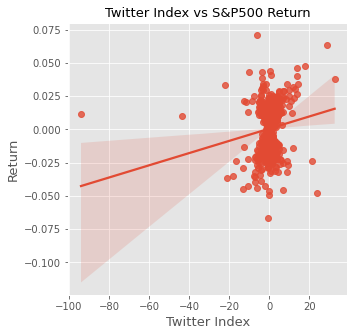

In [84]:
ax = plt.subplots(figsize=(5,5))
ax = sns.regplot(y='Return', x='Twitter Index', data=combined_trade_tweets[['Return','Twitter Index']])
ax.set_title('Twitter Index vs S&P500 Return',fontsize=13)
ax.set_xlabel('Twitter Index',fontsize=13)
ax.set_ylabel('Return',fontsize=13);

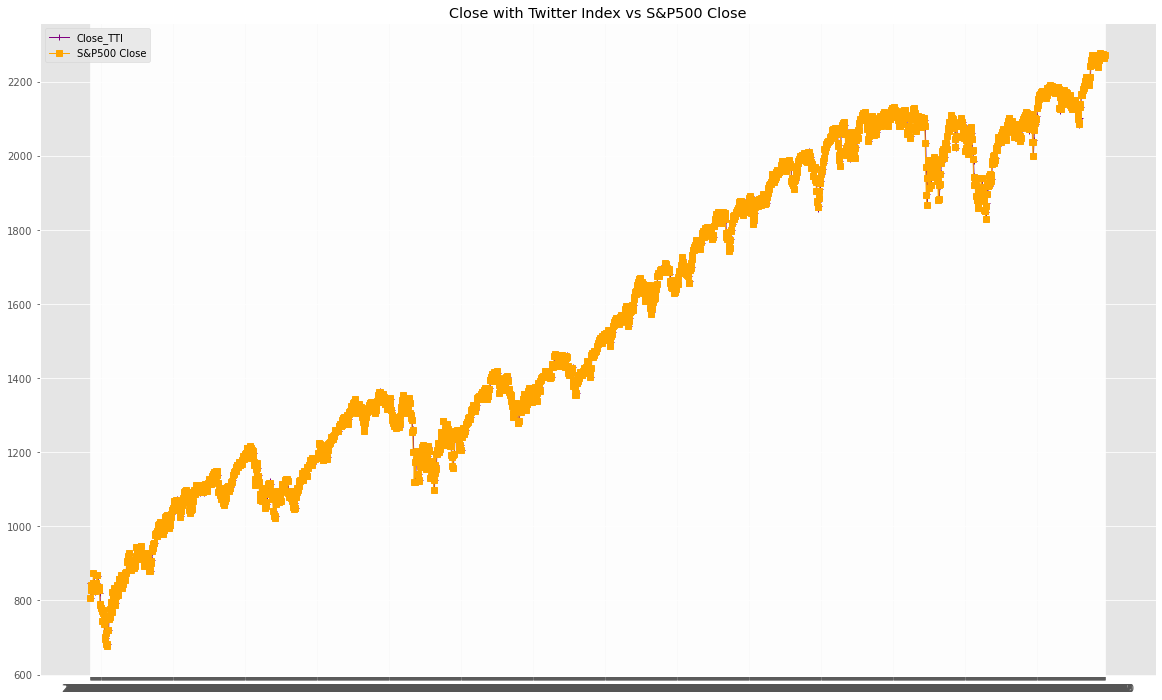

In [85]:
plt.figure(figsize=(20,12))
x_axis = combined_trade_tweets['Date']
plt.title('Close with Twitter Index vs S&P500 Close')

# Create a handle for each plot
Score = plt.plot(x_axis, combined_trade_tweets['Close_TTI'], marker="+",color="Purple",linewidth=1, label="Close_TTI")
Close = plt.plot(x_axis, combined_trade_tweets['Close'], marker="s", color="Orange", linewidth=1, label="Close")
plt.legend((Score[0],Close[0]), ('Close_TTI','S&P500 Close'))
plt.show()

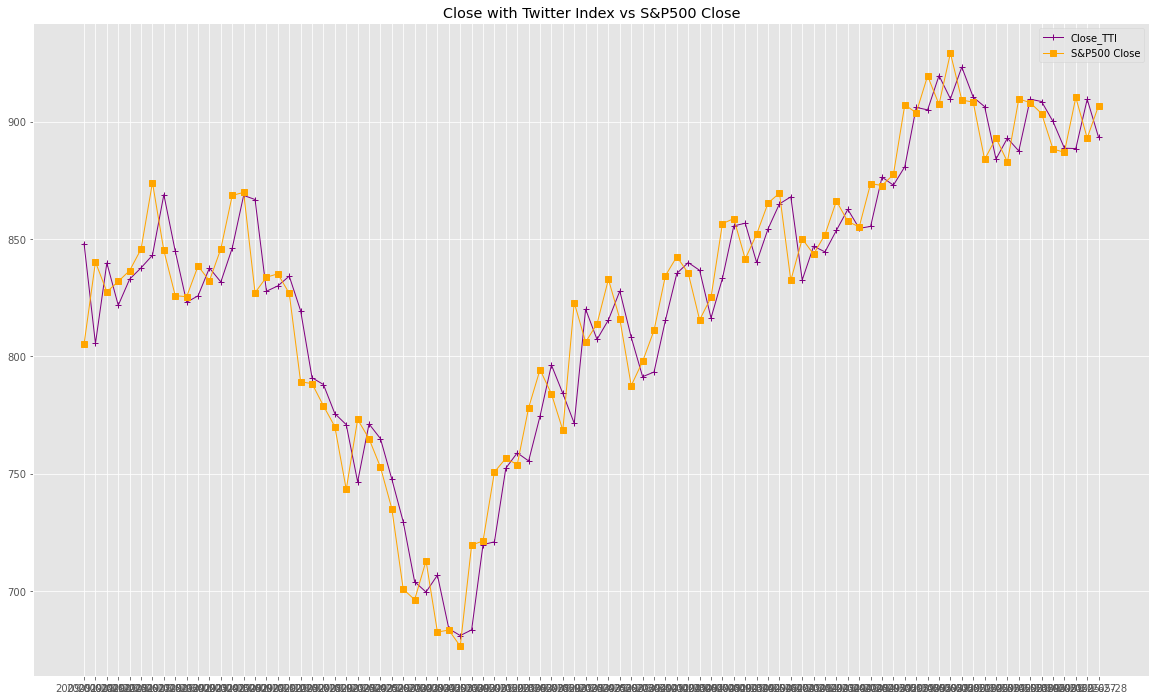

In [86]:
plt.figure(figsize=(20,12))
x_axis = combined_trade_tweets['Date'].iloc[:90]
plt.title('Close with Twitter Index vs S&P500 Close')

# Create a handle for each plot
Score = plt.plot(x_axis, combined_trade_tweets['Close_TTI'].iloc[:90], marker="+",color="Purple",linewidth=1, label="Close_TTI")
Close = plt.plot(x_axis, combined_trade_tweets['Close'].iloc[:90], marker="s", color="Orange", linewidth=1, label="Close")
plt.legend((Score[0],Close[0]), ('Close_TTI','S&P500 Close'))
plt.show()

Interpretation

Visually, there appears to be a moving trend of the stock market (S&P500) and Trump’s tweets. From the correlation map, there is a positive correlation of 0.78 which implies that Trump’s tweets do in fact move with the stock market (S&P500). However, importantly, correlation does not imply causation. In other words, there is no indication of the direction of the relationship.

There are also many individual factors that may affect stock returns such as interest rates, inflation expectations, and other idiosyncratic factors. The interpretation of the relationship found is more likely that the tweets coincide with market-moving events such as a surprising economic data release or a monetary policy decision after markets have reacted to the data.

Upon performing the above EDA, the information provided appears to be relevant to the problem statement. Hence, considered likely to be able to answer their problem statement with the provided data given. As such, I am able to move on to the next part of the project - modelling